<div class="alert alert-info">

# PSY 3019 / 6973 - H24
# Cueillette et traitement des données en neurosciences cognitives
## Chapitre 6: Stats. Scikit-Learn
<p>
<li>Évaluation statistique:<ul>
    <li>Pandas
    <li>SciPy
    <li>Statsmodels
    <li>Pingouin
    <li>Researchpy</ul>
<li>Scikit-Learn: Pré-traitement</p>
</div>

<div class="alert alert-info">
<b><h2>Évaluation statistique</h2></b>

<div class="alert alert-warning">
<h3> Pandas </h3></div>

In [1]:
import pandas
cerveau_df = pandas.read_csv('https://scipy-lectures.org/_downloads/brain_size.csv',
                             sep=';',
                             na_values='.')

In [2]:
cerveau_df.to_csv("data/brain_size.csv")

In [4]:
cerveau_df['Unnamed: 0']

In [5]:
groupby_genre = cerveau_df.groupby('Gender')

In [2]:
# Prendre la moyenne:

groupby_genre.mean()

In [3]:
for genre, valeur in groupby_genre['VIQ']:
    print(genre, valeur.mean())

In [4]:
cerveau_df['FSIQ'].mean()

In [5]:
pandas.plotting.scatter_matrix(
        cerveau_df[['Weight','Height','MRI_Count']]
        )

In [6]:
pandas.plotting.scatter_matrix(
    cerveau_df[['PIQ','VIQ','FSIQ']]
        )

In [7]:
cerveau_df.describe()

<div class="alert alert-success">
    nous pouvons voir que les métriques de QI sont bimodales, comme il y a deux populations.</div>

<div class="alert alert-warning">
<h3> SciPy </h3></div>

<div class="alert alert-success">
<li> auteur original: <b>Travis Oliphant, Pearu Peterson, Eric Jones</b>
<li> Première version: <b>2001</b>
<li> dernière version: <b>1.6.1, 17 février 2021</b>
<li>https://github.com/scipy/scipy</div>

In [8]:
import scipy
scipy.__version__

In [55]:
from scipy import stats

<div class="alert alert-success">
    <h4>Tester la normlité</h4>
<li> scipy.stats.skew()
<li> scipy.stats.kurtosis()
<li>https://www.spcforexcel.com/knowledge/basic-statistics/are-skewness-and-kurtosis-useful-statistics
</div>

In [57]:
print(stats.skew(cerveau_df['VIQ']),
      stats.kurtosis(cerveau_df['VIQ']))

<div class="alert alert-success">
    <h4>Test-T, 1 échantillon</h4>
<li> scipy.stats.ttest_1samp()
<li> tester la valeur d'une moyenne de population
<li> (techniquement si les observations sont tirées d'une distribution gaussienne
d'une moyenne de population donnée)
<li> https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html
<li>Renvoie:<ol>
    <li>la statistique T 
    <li>la valeur de p</ol></div>

In [9]:
stats.ttest_1samp(cerveau_df['VIQ'], 0)

In [12]:
res = stats.ttest_1samp(cerveau_df['VIQ'], 0)
print(res.statistic)

<div class="alert alert-success">
<li> il est possible de tester si la moyenne de population des données est susceptible 
d'être égale à une valeur donnée
</div>

In [13]:
print(res.pvalue)

<div class="alert alert-info">
Avec une valeur de p de 10 ^ -28, nous pouvons affirmer que la moyenne de la population pour l'IQ (mesure VIQ) n'est pas 0</div>

<div class="alert alert-success">
    <h4>Test-T, 2 échantillon</h4>
<li> scipy.stats.ttest_ind()
<li> ttest_ind va calculer le test T pour les moyennes de deux échantillons INDÉPENDANTS
<li> tester la différence entre les populations
<li> ttest_1samp a montré que le VIQ moyen dans les populations femmes et hommes était différent
<li> ttest_ind va montrer si cela est significatif
<li>Renvoie:<ol>
    <li>la statistique T 
    <li>la valeur de p</ol></div>

In [22]:
femme_viq = cerveau_df[cerveau_df['Gender'] == 'Female']['VIQ']
homme_viq = cerveau_df[cerveau_df['Gender'] == 'Male']['VIQ']

In [14]:
stats.ttest_ind(femme_viq, homme_viq)

In [15]:
res = stats.ttest_ind(femme_viq, homme_viq)
print(res.statistic, res.pvalue)

<div class="alert alert-success">
    <h4>Tests appariés: mesures répétées sur les mêmes individus</h4>
<li> scipy.stats.ttest_ind()
<li> PIQ, VIQ et FSIQ donnent 3 mesures de QI
<li> pour tester si FISQ et PIQ sont significativement différents, il faudrait faire un test à 2 échantillons:
<li> nous testerons d'abord en faisant l'hypothèse que les valeurs FSIQ et PIQ sont indépendantes
<li>Renvoie:<ol>
    <li>la statistique T 
    <li>la valeur de p</ol></div>

In [16]:
stats.ttest_ind(cerveau_df['FSIQ'],
                cerveau_df['PIQ'])

<div class="alert alert-success">
    <h4>Tests appariés: mesures répétées sur les mêmes individus</h4>
<li> scipy.stats.ttest_rel()
<ul><li>les observations: FSIQ et PIQ sont mesurés sur les mêmes individus
    <li> c'est un problème, parce que il existe des liens entre les deux variables
<li>la variance due à la variabilité inter-sujets est source de confusion
<li> cette variance peut être supprimée à l'aide d'un «test apparié»
<li> un test t sur deux échantillons LIÉS (related) </ul>
<li> nous testerons maintenant en faisant l'hypothèse que les valeurs FSIQ et PIQ sont LIÉS
<li>Renvoie:<ol>
    <li>la statistique T 
    <li>la valeur de p</ol></div>

In [17]:
stats.ttest_rel(cerveau_df['FSIQ'],
                cerveau_df['PIQ'])

<div class="alert alert-success">
    <h4>Test de rang signé</h4>
<ul>
    <li> apparié: scipy.stats.wilcoxon() <b>Wilcoxon</b>
    <li> non-apparié: scipy.stats.mannwhitneyu() <b>Mann-Whitney</b></ul>

<ul><li>Les tests T supposent des erreurs gaussiennes
    <li>le test de rang signé de Wilcoxon, peut assouplir cette hypothèse</ul>
<li>Renvoie:<ol>
    <li>la statistique T 
    <li>la valeur de p</ol></div>

In [28]:
stats.wilcoxon(cerveau_df['FSIQ'],
               cerveau_df['PIQ'])

<div class="alert alert-info">
Comment pouvons-nous effectuer une analyse statistique plus complexe:
<ul>
<li>Modèles linéaires, facteurs multiples et analyse de variance?
<li>Une régression linéaire simple?
<li>Étant donné deux ensembles d'observations, x et y, comment tester l'hypothèse que y est une fonction linéaire de x?</ul></div>

<div class="alert alert-warning">
<h3> statsmodels </h3></div>

<div class="alert alert-success">
<li> auteur original: <b>Jonathan Taylor</b>
<li> Première version: <b>2009</b>
<li> dernière version: <b>0.12.2</b>, 2 février 2021
<li> construit sur la base de NumPy, SciPy, Pandas, Matplotlib
<li>https://www.statsmodels.org/stable/index.html</div>

In [18]:
import statsmodels
statsmodels.__version__

In [29]:
from statsmodels.formula.api import ols #Ordinary Least Squares

# https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html
    
# ols("y ~ x", pandas.DataFrame).fit()

In [30]:
model = ols("FSIQ ~ PIQ", cerveau_df).fit()

In [19]:
print(model.summary())

<div class="alert alert-success">
<li>Statsmodels utilise une terminologie statistique:
<li>la variable y dans les modèles statistiques est appelée «endogène»: la valeur que vous essayez de prédire

<li>la variable x est appelée exogène: représente les fonctionnalités que vous utilisez pour effectuer la prédiction

<li>en détail ici: http://www.statsmodels.org/devel/endog_exog.html</div>

In [35]:
cerveau_df.Gender

In [20]:
# Intercept: nous pouvons supprimer l'intercept 
# en utilisant - 1 dans la formule,
# ou forcer l'utilisation d'une intercept en utilisant + 1.

model = ols("VIQ ~ Gender + 1", cerveau_df).fit()

# le «genre» est automatiquement détecté comme une variable catégorielle,
# et donc chacune de ses différentes valeurs est traitée
# comme des entités différentes.

print(model.summary())

'Variables catégorielles: \ncomparaison de groupes ou de plusieurs catégories\n\nNous pouvons écrire une comparaison entre \nle QI des hommes et des femmes \nen utilisant un modèle linéaire:\n'

In [37]:
# Une colonne entière peut être forcée d'être traitée 
# comme catégorique en utilisant la lettre C:

model = ols("VIQ ~ C(Gender)", cerveau_df).fit()

<div class="alert alert-success">
<li>Par défaut, les modèles statistiques traitent une variable catégorielle avec K valeurs possibles comme K-1 variables booléennes «factices» (le dernier niveau étant absorbé dans le terme d'interception). <li>C'est presque toujours un bon choix par défaut - cependant, il est possible de spécifier différents encodages pour les variables catégorielles (http://statsmodels.sourceforge.net/devel/contrasts.html)</div>

<div class="alert alert-success">
    <h4>Régression multiple: incluant plusieurs facteurs</h4>
</div>

In [39]:
iris = pandas.read_csv("https://scipy-lectures.org/_downloads/iris.csv")

In [21]:
iris.columns

In [41]:
iris.name.tolist()

In [22]:
iris['name']

In [23]:
model = ols('sepal_width ~ name + petal_length', iris).fit()

print(model.summary())

<div class="alert alert-success">
<h4>Test d'hypothèse post-hoc: analyse de variance (ANOVA)</h4><p>

<li> https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.f_test.html
<li>nous souhaitons tester:<ol>
    <li>si la LONGueur des PÉTales est différente entre: (petal_length)<ul>
        <li>le versicolor et
        <li>le virginica</ul>
    <li>après avoir supprimé l'effet de la LARGeur des SÉPales (sepal_width).</ol>

<li>Cela peut être formulé comme:<ol>
    <li>testant la différence entre le coefficient associé au:<ul>
        <li>versicolor et au
        <li>virginica</ul>
    <li>dans le modèle linéaire estimé</ol>
<li>il s'agit d'une analyse de variance, ANOVA</div>

In [24]:
model = ols('sepal_width ~ name + petal_length', iris).fit()

model.summary()

In [25]:
model.params

<div class="alert alert-success">
<li>Pour cela, nous écrivons un vecteur de «contraste» sur les paramètres estimés:
<li>pour tester avec un test F:
    <li>«T.versicolor - T.virginica» (la différence)
</div>

In [26]:
print(model.f_test([0, 1, -1, 0]))

<div class="alert alert-success">
    <h4>Commment tester les interactions</h4>
</div>

In [50]:
# import urllib
import urllib.request

urllib.request.urlretrieve(
            'http://lib.stat.cmu.edu/datasets/CPS_85_Wages',
            'wages.txt')

salaire = pandas.read_csv('wages.txt',
                            skiprows = 27, skipfooter = 6, sep = None,
                            header = None,
                            names = ['education', 'gender', 'wage'],
                            usecols = [0, 2, 5],
                            engine = 'python'
                            )

In [28]:
salaire.columns

In [ ]:
import seaborn as sns

In [29]:
# sns.lmplot permet de tracer une
# régression univariée

# voici une régression saisissant
# la relation entre une variable et une autre
# par exemple le salaire et l'éducation

sns.lmplot(y = 'wage',
           x = 'education',
           data = salaire)

In [30]:
sns.pairplot(salaire,
             vars = ['wage', 'gender', 'education'],
             kind = 'reg')

In [31]:
# Les variables catégorielles peuvent être tracées comme teinte:

sns.pairplot(salaire,
             vars=['wage', 'education'],
                kind = 'reg', hue = 'gender')

In [32]:
sns.lmplot(y = 'wage',
           x = 'education',
           hue = 'gender',
           data = salaire)

<div class="alert alert-success">
<li>Les salaires augmentent-ils davantage avec l'éducation des hommes que des femmes?

<li>L'intrigue ci-dessus est composée de deux ajustements différents. Nous devons formuler un modèle unique qui teste la variance de la pente entre les deux populations. Cela se fait via une «interaction».</div>

In [33]:
print(ols(formula = 'wage ~ education + gender',
                data=salaire).fit().summary())

<div class="alert alert-success">
les résultats ci-dessus soulignent qu'il y a une compensation différente des salaires par education et par genre</div>

In [34]:
formula = 'wage ~ education + gender + education * gender'

model_anova = ols(formula = formula,
                  data = salaire).fit()

print(model_anova.summary())

In [35]:
model_anova.pvalues.loc['education:gender']

<div class="alert alert-success">
Pouvons-nous conclure que l'éducation profite plus aux hommes qu'aux femmes?

<li>la valeur de p de l'interaction entre le sexe et l'éducation
<li>education:gender
<li>ne soutiennent pas l'hypothèse selon laquelle l'éducation profite davantage aux hommes qu'aux femmes (valeur de p> 0,05)
</div>

<div class="alert alert-warning">
<h3> pingouin </h3></div>

In [ ]:
#!pip3 install pinguoin
# https://pingouin-stats.org/build/html/index.html
import pingouin
import pandas

In [24]:
import warnings
warnings.filterwarnings("ignore")

In [52]:
cerveau_df = pandas.read_csv('https://scipy-lectures.org/_downloads/brain_size.csv',
                             sep=';',
                             na_values='.')

In [7]:
cerveau_df.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [9]:
# vérifier la normalité

pingouin.normality(cerveau_df, group='Gender', dv='FSIQ')

,W,pval,normal
Female,0.819564,0.001717,False
Male,0.820351,0.001766,False


In [10]:
# vérifier la homocedasciter

pingouin.homoscedasticity(cerveau_df, group='Gender', dv='FSIQ')

,W,pval,equal_var
levene,0.24447,0.623842,True


In [25]:
pingouin.chi2_independence(cerveau_df, 'MRI_Count', 'Gender')

(Gender     Female  Male
 MRI_Count              
 790619        0.5   0.5
 793549        0.5   0.5
 798612        0.5   0.5
 808020        0.5   0.5
 816932        0.5   0.5
 831772        0.5   0.5
 833868        0.5   0.5
 834344        0.5   0.5
 852244        0.5   0.5
 854258        0.5   0.5
 856472        0.5   0.5
 857782        0.5   0.5
 865363        0.5   0.5
 866662        0.5   0.5
 878897        0.5   0.5
 879987        0.5   0.5
 889083        0.5   0.5
 892420        0.5   0.5
 893983        0.5   0.5
 904858        0.5   0.5
 905940        0.5   0.5
 924059        0.5   0.5
 928799        0.5   0.5
 930016        0.5   0.5
 935494        0.5   0.5
 935863        0.5   0.5
 945088        0.5   0.5
 948066        0.5   0.5
 949395        0.5   0.5
 949589        0.5   0.5
 951545        0.5   0.5
 955003        0.5   0.5
 955466        0.5   0.5
 965353        0.5   0.5
 991305        0.5   0.5
 997925        0.5   0.5
 1001121       0.5   0.5
 1038437       0.5   0.5


In [45]:
# Run the ANOVA
pingouin.anova(data=cerveau_df, dv='MRI_Count', between='Gender', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Gender,8.500988e+10,1,8.500988e+10,27.202424,0.000007,0.4172
1,Within,1.187532e+11,38,3.125085e+09,NaN,NaN,NaN


<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

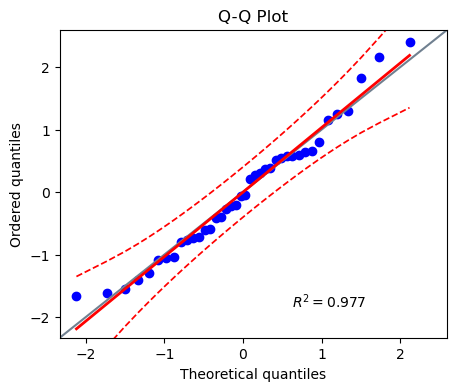

In [47]:
pingouin.qqplot(cerveau_df["MRI_Count"], dist='norm')

<div class="alert alert-warning">
<h3> researchpy </h3></div>

In [ ]:
#!pip install researchpy
# https://researchpy.readthedocs.io/en/latest/
import researchpy

In [48]:
researchpy.summarize(cerveau_df["MRI_Count"])

,Name,N,Mean,Median,Variance,SD,SE,95% Conf. Interval
0,MRI_Count,40,908755.0,905399.0,5224694597.641,72282.0489,11428.7954,"[885638.0794, 931871.9206]"


In [32]:
researchpy.ttest(group1 = cerveau_df['FSIQ'][cerveau_df['Gender'] == "Female"], group1_name = 'Women',
                 group2 = cerveau_df['FSIQ'][cerveau_df['Gender'] == "Male"], group2_name = 'Men')

(        Variable     N    Mean         SD        SE   95% Conf.    Interval
 0  Presence Quip  20.0  111.90  23.686327  5.296424  100.814458  122.985542
 1   Absence Quip  20.0  115.00  24.986312  5.587109  103.306046  126.693954
 2       combined  40.0  113.45  24.082071  3.807710  105.748180  121.151820,
                              Independent t-test  results
 0  Difference (Presence Quip - Absence Quip) =   -3.1000
 1                         Degrees of freedom =   38.0000
 2                                          t =   -0.4027
 3                      Two side test p value =    0.6894
 4                     Difference < 0 p value =    0.3447
 5                     Difference > 0 p value =    0.6553
 6                                  Cohen's d =   -0.1273
 7                                  Hedge's g =   -0.1248
 8                             Glass's delta1 =   -0.1309
 9                           Point-Biserial r =   -0.0652)

<div class="alert alert-info">

<b><h2>Scikit-Learn</h2></b>

<div class="alert alert-success">
<li> auteur original: <b>David Cournapeau</b>
<li> Première version: <b>Juin 2007</b>
<li> dernière version: <b>0.24.1</b>, janvier 2021
<li> noyau: a été initialement développé comme une extension de SciPy
<li> Leadership actuel (INRIA - Institut national de recherche en informatique et en automatique, Rocquencourt, France)
    <ol>
        <li><b>Fabian Pedregosa</b><li><b>Gael Varoquaux</b><li><b>Alexandre Gramfort</b><li><b>Vincent Michel</b> </ol></div>

<div class="alert alert-success">
<h3>Prétraitement des données</h3>
    <ul>
        <li>les données nécessitent plusieurs étapes d'ajustements avant de pouvoir être analysées.
        <li>ces étapes sont généralement appelées - prétraitement.
        <li>certaines des étapes courantes de prétraitement sont:<ol>
            <li>encodage d'étiquette
            <li>normalisation des données (mise à l'échelle)
            <li>imputation des valeurs manquantes</ol>
        <li>pour cela nous pouvons utiliser le module: <b>sklearn.preprocessing</b> et <b>sklearn.impute</b></ul>
</div>

In [36]:
# code écrit pour sklearn.__version__ == 0.24.1

import sklearn
sklearn.__version__

<div class="alert alert-warning">
<h3> encodage/ binarisation d'étiquette </h3></div>

In [61]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [37]:
iris.head()

In [38]:
iris.species

<div class="alert alert-success">
    <h5>sklearn.preprocessing.LabelEncoder()</h5>
<li>permet d'encodez les étiquettes cibles avec une valeur comprise entre 0 et n_classes-1
<li>https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html</div>

In [39]:
# LabelEncoder est une classe,
# pour l'utiliser, il est plus facile de l'instancier.

# le = sklearn.preprocessing.LabelEncoder()

# Alternativement:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [66]:
# Initialement, les données doivent être adaptées au codeur d'étiquettes.

le.fit(iris.species)

In [68]:
# après cela, les étiquettes peuvent être transformées en codage normalisé.

le.transform(iris.species)

In [40]:
# Alternativement, les étiquettes peuvent être ajustées à l'encodeur
# et transformées avec une seule commande. 

le.fit_transform(iris.species)

<div class="alert alert-warning">
<h3> normalisation des données </h3></div>

<div class="alert alert-success">
<h4>Importance de la mise à l'échelle des fonctionnalités </h4>
<li> Normalisation = redimensionnement des entités de sorte qu'elles aient les propriétés d'une <b>distribution normale standard</b> avec une <b>moyenne de zéro et un écart type de un</b>

<li> La mise à l'échelle des fonctionnalités (normalisation du score Z) peut être importante ou même requise pour de nombreux algorithmes AA (tels que PCA, SVM, KNN et régression logistique)
<li>la normalisation permet la suppression des valeurs aberrantes.
</div>

<div class="alert alert-success">
<h4>Exemples d'algorithmes de transformation linéaire gaussienne</h4>
    <li>sklearn.preprocessing.StandardScaler()
    <li>sklearn.preprocessing.RobustScaler()
    <li>pour plus d'informations sur la normalisation et la comparaison des échelles:
    <li> https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py
</div>

In [67]:
scaler = sklearn.preprocessing.StandardScaler()

In [41]:
iris.columns

In [69]:
X_data = iris[["sepal_length",
               "sepal_width",
               "petal_length",
               "petal_width"]]

scaled = scaler.fit(X_data)

In [44]:
scaled.mean_

In [74]:
transformed = scaler.transform(X_data)
# transformed

In [77]:
# to scale only one column:

import numpy as np

x_one = iris.sepal_length.to_numpy()
x_one = x_one[:, np.newaxis]
scaled_one = scaler.fit(x_one)

<div class="alert alert-success">
<li>Si les données contiennent de nombreuses valeurs aberrantes, la mise à l'échelle à l'aide de la moyenne et de la variance des données ne fonctionnera probablement pas très bien
<li>Dans ces cas, RobustScaler utilise des estimations plus robustes pour le centre et la plage de vos données.
</div>

<div class="alert alert-success">
<h4>Exemples d'algorithmes de transformation non-linéaire non-gaussienne</h4>
    <li>sklearn.preprocessing.QuantileTransformer()
    <li>sklearn.preprocessing.PowerTransformer()
    <li>les deux algorithm sont basées sur des transformations monotones des entités (ligne ou colonnes) et maintienent le rang des valeurs le long de chaque entité
    <li>cependant, le QuantileTransformer() déforme les corrélations et les distances à l'intérieur et entre les entités.
    <li>Les PowerTransformer est une famille de transformations paramétriques qui visent à mapper les données de n'importe quelle distribution à une distribution gaussienne aussi proche que possible.
</div>

In [45]:
scaler = sklearn.preprocessing.QuantileTransformer()

X_iris = iris[["sepal_length",
               "sepal_width",
               "petal_length",
               "petal_width"]]
X_scaled = scaler.fit_transform(X_iris)
X_scaled

In [76]:
import numpy as np

In [46]:
X_iris_arr = X_iris.to_numpy()

print(np.percentile(X_iris_arr[:, 0], [0, 25, 50, 75, 100]))
print(np.percentile(  X_scaled[:, 0], [0, 25, 50, 75, 100]))

# Une fois la QuantileTransformer appliquée,
# ces repères se rapprochent étroitement
# des centiles précédemment définis

<div class="alert alert-warning">
<h3> Imputation des valeurs manquantes </h3></div>

<div class="alert alert-success">
<li>scikit-learn suppose que toutes les valeurs sont numériques et ont toutes une signification. Les données manquantes sont incompatibles avec scikit-learn.

<li> de nombreux ensembles de données du monde réel contiennent des valeurs manquantes, souvent codées sous forme de blancs, de NaN ou d'autres espaces réservés.

<li> Lorsque des données sont manquantes, une stratégie de base consiste à supprimer des lignes entières et / ou des colonnes contenant des valeurs manquantes.

<li> Une meilleure stratégie consiste à imputer les valeurs manquantes, c'est-à-dire à les déduire de la partie connue des données.
<li>https://scikit-learn.org/stable/modules/impute.html
</div>

<div class="alert alert-success">
<h4>L'algorithme d'imputation univarié: sklearn.impute.SimpleImputer</h4>
<li>impute des valeurs dans la n-ième dimension d'entité (ligne, colonne)
<li>en utilisant uniquement les valeurs non manquantes dans cette dimension d'entité (ligne, colonne)
</div>

In [78]:
from sklearn import impute

In [79]:
imp = impute.SimpleImputer(missing_values = np.nan,
                           strategy = "mean")

#median, most_frequent, constant

In [81]:
fichier = 'https://scipy-lectures.org/_downloads/brain_size.csv'
cerveau_df = pandas.read_csv(fichier,
                             sep=';',
                             na_values='.')

In [90]:
# y a-t-il des valeurs manquantes?

cerveau_df.Height.isnull().any(), cerveau_df.Weight.isnull().any()

(True, True)

In [47]:
# trouvons l'index de la colonne avec des données manquantes
X_data = cerveau_df[["Weight", "Height"]]

ix = X_data.Height[X_data.Height.isnull()].index.tolist()[0]
X_data.iloc[ix]

In [48]:
imp.fit(X_data)

In [84]:
X_new = imp.transform(X_data)

In [49]:
# Attention! les données résultantes sont au format numpy

X_new[ix]

In [50]:
# Changeons pour la valeur la plus fréquente. 

imp = sklearn.impute.SimpleImputer(missing_values = np.nan,
                                   strategy = "most_frequent")
imp.fit(X_data)
X_new = imp.transform(X_data)
X_new[ix]

<div class="alert alert-danger">
<b>les commandes et codes à apprendre par cœur </b></div>

In [ ]:
PANDAS:
    pandas.read_csv(filepath, sep=<object>, header=None, 
                    names=['col1', 'col2'], usecols=[0, 2, 5],
                    skiprows=27, skipfooter=6, na_values='.'
                       ) # sep = ';', sep = None, na_values = None
SCIPY:
    scipy.stats.ttest_1samp(pandas.DataFrame['col_y'], 0)
    scipy.stats.ttest_ind(pandas.DataFrame['col_y'], pandas.DataFrame['col_x'])
    scipy.stats.ttest_rel(pandas.DataFrame['col_y'], pandas.DataFrame['col_x'])
    scipy.stats.wilcoxon(pandas.DataFrame['col_y'], pandas.DataFrame['col_x'])
    
STATSMODELS:
    from statsmodels.formula.api import ols #Ordinary Least Squares    
    ols("col_y ~ col_x", pandas.DataFrame).fit()
    ols("col_y ~ col_group + 1", pandas.DataFrame).fit()
    ols("col_y ~ C(col_group)", pandas.DataFrame).fit()
    model = ols('col_y ~ col_group + col_x', pandas.DataFrame).fit()
        model.rsquared_adj
        model.fvalue
        model.f_pvalue
        model.params
        model.tvalues
        model.pvalues
        model.pvalues[0]
        model.pvalues["Intercept"]
        model.pvalues.loc['Intercept']
        model.f_test([0, 1, -1, 0]))
        
PINGOUIN:
    pingouin.normality(dataframe, group='col_group', dv='col_y')
    pingouin.anova(data=dataframe, dv='col_y', between='col_group', detailed=True)
    pingouin.chi2_independence(dataframe, 'col_y', 'col_group')
    pingouin.homoscedasticity(dataframe, group='col_group', dv='col_y')

RESEARCHPY:
    researchpy.ttest(group1 = dataframe['col_y'][cerveau_df['col_group'] == "group2_name"], group1_name = 'group2_name',
                 group2 = dataframe['col_y'][cerveau_df['col_group'] == "group1_name"], group2_name = 'group2_name')
    researchpy.summarize(dataframe["col_y"])

SKLEARN:
    sklearn.preprocessing.LabelEncoder()
        fit_transform(pandas.DataFrame['col_y'])
    sklearn.preprocessing.StandardScaler()
        fit(pandas.DataFrame['col_x1', 'col_x2'])
        transform(pandas.DataFrame['col_x1', 'col_x2'])
        
        one_feat = pandas.DataFrame['col_x1'].to_numpy()
        one_feat = one_feat[:, np.newaxis]
        fit(one_feat)
        transform(one_feat)        
    sklearn.preprocessing.QuantileTransformer()
        fit_transform(pandas.DataFrame)
    sklearn.impute.SimpleImputer(missing_values = np.nan,
                                 strategy = "mean")
                                # strategy = median,
                                # most_frequent,
                                # constant
        fit(pandas.DataFrame)
        transform(pandas.DataFrame)

<div class="alert alert-danger">
<h4>Exercices</h4><p>
</div>

<div class="alert alert-danger">
<ol start=1><li>list (poids = 0.5, durée suggéree: 2min)
<ul><li>quelles sont les méthodes utilisées pour rechercher les valeurs manquantes
</ul></ol></div>

<div class="alert alert-danger">
<ol start=2><li>list (poids = 0.8, durée suggéree: 5min)
<ul><li>utiliser l'algorithme SimpleImputer, mais avec les méthodes disponibles dans d'autres bibliothèques
</ul></ol></div>

<div class="alert alert-danger">
<ol start=3><li>list (poids = 2, durée suggéree: 15min)
<ul><li>cadre de données cerveau: cerveau_df = pandas.read_csv('https://scipy-lectures.org/_downloads/brain_size.csv', sep=';', na_values='.')
<li> Testez la différence entre les poids des cerveau des femmes et des hommes
<li> Utilisez des statistiques non paramétriques pour tester la différence entre le VIQ chez les hommes et les femmes.
<li>créer le modèle à l'aide de statsmodels
<li> Récupérez les paramètres estimés du modèle.
<li>Astuce: utilisez la saisie TAB, semi-automatique pour trouver l'attribut pertinent.
</ul></ol></div>